# Tarea 6
### Autor: Guillermo Fonseca
### Fecha: 28/09/2020
### Asignatura: REDES NEURONALESAVANZADAS DE APRENDIZAJE PROFUNDO IMA543

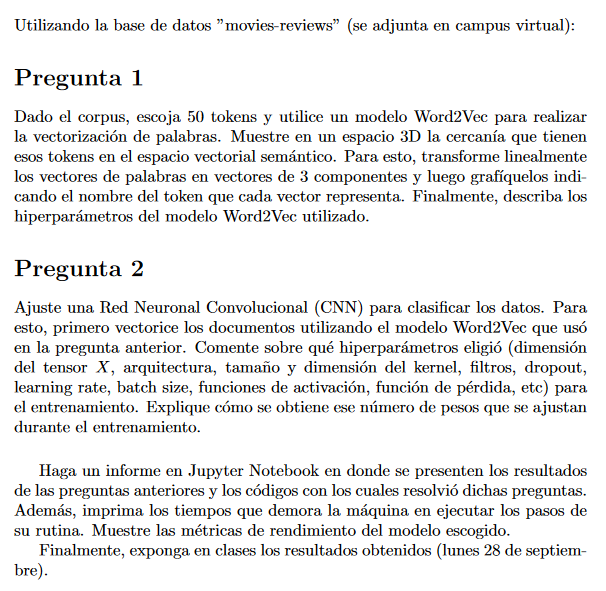

## Importar Librerias

In [1]:
import pandas as pd
import numpy as np
import os.path
from gensim.models.word2vec import Word2Vec

## Leer Base de Datos

In [2]:
df_documents = pd.read_csv("movies_reviews.csv")
df_documents

,review,sentiment
0,"In 1974, the teenager Martha Moxley (Maggie Gr...",1
1,OK... so... I really like Kris Kristofferson a...,0
2,"***SPOILER*** Do not read this, if you think a...",0
3,hi for all the people who have seen this wonde...,1
4,"I recently bought the DVD, forgetting just how...",0
...,...,...
49995,"OK, lets start with the best. the building. al...",0
49996,The British 'heritage film' industry is out of...,0
49997,I don't even know where to begin on this one. ...,0
49998,Richard Tyler is a little boy who is scared of...,0


In [3]:
corpus = df_documents.values.T[0]
labels = df_documents.values.T[1]
del df_documents
print("Base de datos leída")

Base de datos leída


# Pregunta 1

## Tokenizacion

In [4]:
from libreria.tokenizacion import Tokenizador
# text_remove:  Eliminamos caracteres del texto que no se tokenizan bien
# reduce_len:   Reducimos el largo de palabras que repiten caracteres
# strip_handle: Quitamos @handles de twitter
# stopwords:    Eliminar stopwords
# stemming:     Relizar stemming
# puntuacion:   Eliminar puntuacion
# numbers:      Eliminar numeros
# token_remove: Eliminamos tokens que contengan caracteres
tokenizer = Tokenizador(text_remove=1, reduce_len=1, strip_handles=1,stopwords=1,
                        puntuacion=1, numbers=1, token_remove=1, stemming=1).tokenize

## Word2Vec

In [5]:
# Word2Vec de Google
# Se debe utilizar la tokenizacion nltk.word_tokenize()
#import os
#from nlpia.loaders import get_data
#wv = get_data("word2vec")

name = 'Word2VecV6'

if name == 'Word2VecV2':
    max_final_vocab=None
    embedding_dims=100
    window=4
    min_count=1
    workers=8
    sg=1
    alpha=0.001
    iterations = 10

if name == 'Word2VecV3':
    max_final_vocab=None
    embedding_dims=150 
    window=4
    min_count=2
    workers=8
    sg=1
    alpha=0.001
    iterations = 15

if name == 'Word2VecV4':
    max_final_vocab = 10000
    embedding_dims=150 
    window=5
    min_count=5
    workers=8
    sg=1
    alpha=0.001
    iterations = 10
    
if name == 'Word2VecV5':
    max_final_vocab = 5000
    embedding_dims=150 
    window=5
    min_count=5
    workers=8
    sg=1
    alpha=0.001
    iterations = 10
    
if name == 'Word2VecV6':
    max_final_vocab = 1000
    embedding_dims=100 
    window=5
    min_count=5
    workers=8
    sg=1
    alpha=0.001
    iterations = 10

In [6]:
%%time
if not os.path.isfile(name):
    tok_corp = [tokenizer(doc) for doc in corpus]

Wall time: 4min 32s


In [7]:
%%time
if os.path.isfile(name):
    model = Word2Vec.load(name)
else:
    model = Word2Vec(tok_corp, size=embedding_dims, window=window, min_count=min_count, workers=workers, 
                     sg=sg, alpha=alpha, iter=iterations, max_final_vocab=max_final_vocab)
    model.save(name)

wv = model.wv
embedding_dims=wv.vector_size
print("Word2Vec de tamaño", embedding_dims)
print("Word2Vec listo")

Word2Vec de tamaño 100
Word2Vec listo
Wall time: 1min 15s


In [6]:
if os.path.isfile(name):
    model = Word2Vec.load(name)
wv = model.wv
embedding_dims=wv.vector_size
print("Word2Vec de tamaño", embedding_dims)
print("Word2Vec listo")

Word2Vec de tamaño 100
Word2Vec listo


## Palabras mas frecuentes

In [8]:
# Largo total del vocabulario
print(len(wv.vocab))

1000


In [9]:
dictionary = dict()
for item in model.wv.vocab:
    dictionary[item]=model.wv.vocab[item].count

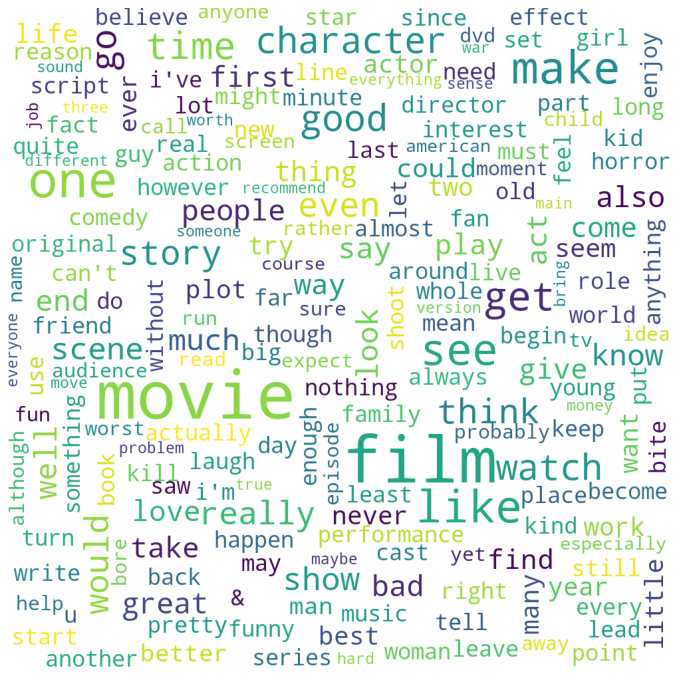

In [10]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

fig1 = plt.figure(num=None, figsize=(11, 11), dpi=80, facecolor='w', edgecolor='k')
wc = WordCloud(background_color="white",width=1000,height=1000,max_font_size=100).generate_from_frequencies(dictionary)
plt.axis("off")
plt.imshow(wc)

In [11]:
wv.most_similar('good')

[('decent', 0.8276679515838623),
 ('bad', 0.8157404065132141),
 ('nice', 0.8101933002471924),
 ('awesome', 0.8098776936531067),
 ('okay', 0.805670976638794),
 ('ok', 0.8020294904708862),
 ('great', 0.7953160405158997),
 ('average', 0.7889871001243591),
 ('cool', 0.7773740291595459),
 ('usually', 0.7768739461898804)]

In [12]:
wv.most_similar('bad')

[('suck', 0.8672929406166077),
 ('horrible', 0.8494884371757507),
 ('awful', 0.8394091725349426),
 ('plain', 0.8291837573051453),
 ('pathetic', 0.8199393153190613),
 ('terrible', 0.8195037841796875),
 ('ok', 0.8187915682792664),
 ('good', 0.8157403469085693),
 ('okay', 0.8131996393203735),
 ('lame', 0.7986031174659729)]

In [13]:
wv.most_similar('okay')

[('ok', 0.9812227487564087),
 ('anyway', 0.9203066229820251),
 ('suck', 0.9058352708816528),
 ('guess', 0.8982049226760864),
 ('mess', 0.8915408849716187),
 ('either', 0.8841553926467896),
 ('dumb', 0.8828719854354858),
 ('yes', 0.8817461133003235),
 ('yeah', 0.8807120323181152),
 ('stick', 0.878403902053833)]

In [14]:
wv.most_similar('movie')

[('film', 0.81640625),
 ('taste', 0.7550183534622192),
 ('flick', 0.7451761364936829),
 ('trash', 0.7428441643714905),
 ('mistake', 0.7391932010650635),
 ('admit', 0.7348558902740479),
 ('sequel', 0.7338382005691528),
 ('unless', 0.7311006784439087),
 ('opinion', 0.7309314012527466),
 ('avoid', 0.7183259129524231)]

## Reduccion de dimension con PCA
Podemos convertir el corpus completo en un tensor, donde cada elemento será una matriz, y podemos elegir una cantidad de tokens, para graficarlos en un grafico 3D.

In [7]:
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from matplotlib import animation
from IPython.display import HTML

def plot3D_tokens(model, words):
    '''Plot "words" in a 3D scattering graph, from a model'''
    vectors = []
    for w in words:
        vectors.append(model.wv[w])
    # Iniciamos un vector vacio que contendra la vectorizacion
    # de cada token, para graficar los tokens
    vectors = np.array(vectors)
    vectors = vectors - vectors.mean()
    pca = PCA(n_components=3)
    df2d = pd.DataFrame(pca.fit_transform(vectors), columns = list('xyz'))
    x = df2d['x']
    y = df2d['y']
    z = df2d['z']
    
    #Graficamos
    fig = plt.figure(num=None, figsize=(10, 10), dpi=80, facecolor='w', edgecolor='k')
    ax = Axes3D(fig)
    ax.scatter(x, y, z)
    
    #Etiquetar los puntos
    x_shift = 0.05
    y_shift = 0.03
    for i, word in enumerate(words):
        ax.text(x[i] + x_shift, y[i] - y_shift, z[i], word, size=8)
    return fig
    #plt.show()

### Graficando las 50 más frecuentes

Graficando 50 tokens unicos


<IPython.core.display.Javascript object>


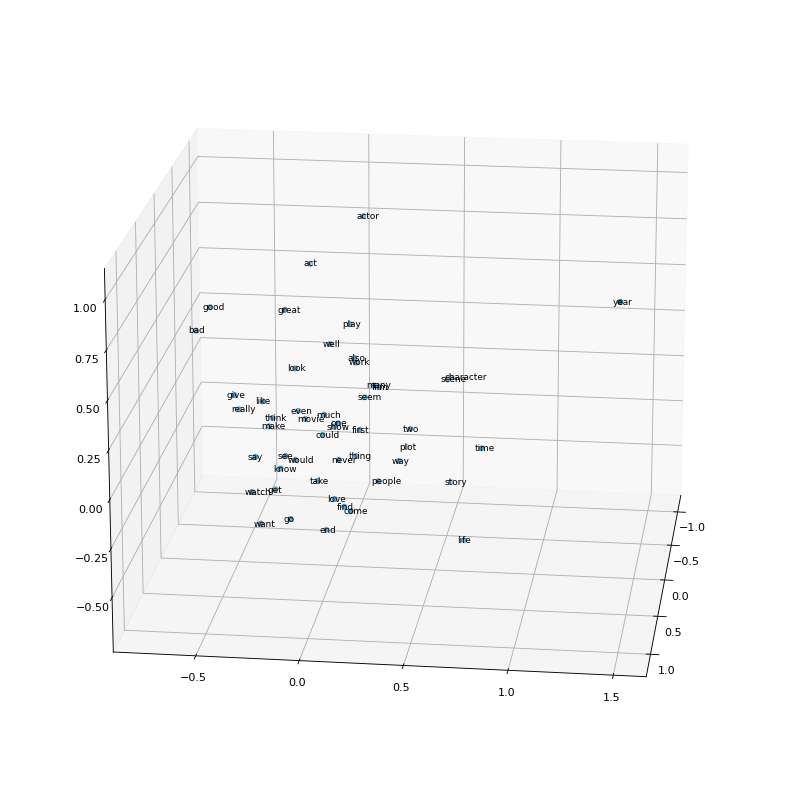

In [10]:
%matplotlib notebook
words = wv.index2entity[:50]
print("Graficando", len(words), "tokens unicos")
fig = plot3D_tokens(model, words)
plt.show()

### Graficando las mas "similares" a palabras seleccionadas

Graficando 50 tokens unicos


<IPython.core.display.Javascript object>


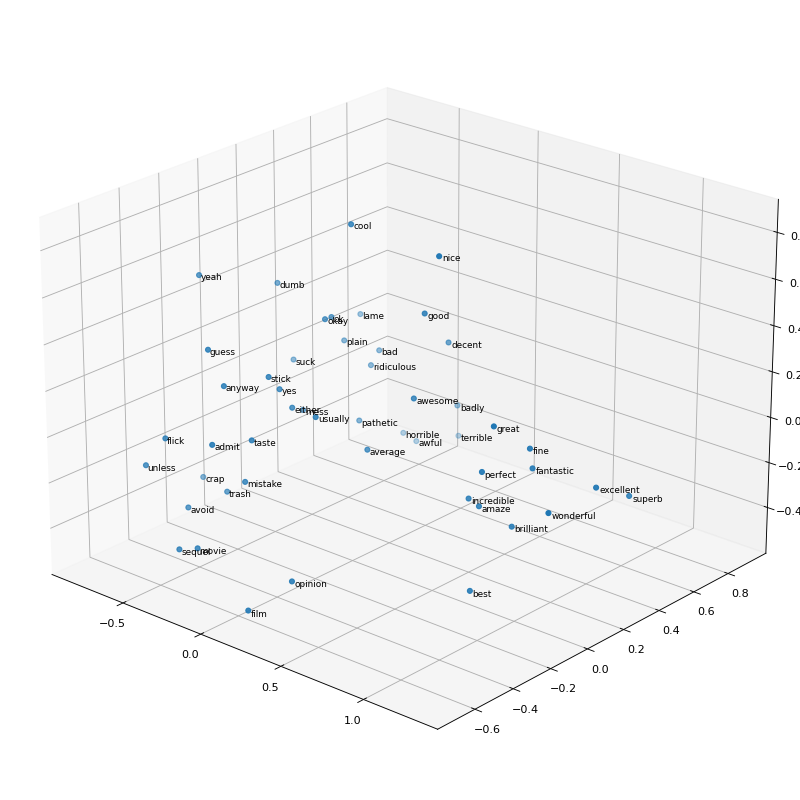

In [11]:
%matplotlib notebook
# Elegimos los tokens
words = np.concatenate([np.array(wv.most_similar('bad')).T[0], 
                        np.array(wv.most_similar('okay')).T[0],
                        np.array(wv.most_similar('good')).T[0],
                        np.array(wv.most_similar('movie')).T[0],
                        np.array(wv.most_similar('great')).T[0],
                        np.array(wv.most_similar('awful')).T[0],
                        ['movie', 'good','best']
                       ])

words = np.unique(words)
print("Graficando", len(words), "tokens unicos")

fig = plot3D_tokens(model, words)

plt.show()

# Pregunta 2

## Vectorizacion
Se realiza vectorizacion, pad_truncate y normalizacion
pad_truncate se realiza ya que, en el tensor, cada documento tiene diferentes cantidad de tokens, normalizaremos esto

In [18]:
from libreria.vectorizacion import Vectorizador as Vectorizer
import pickle
maxlen = 200
scaling = [-1, 1]
vectorizador = Vectorizer(tokenizer, wv, maxlen, scaling=scaling, dtype=np.float16)
name_X = f"{name}_X_{maxlen}{scaling}.pickle"

In [18]:
%%time
# Tokenizacion + vectorizacion
if not os.path.isfile(name_X):
    X = vectorizador.vectorizacion(corpus)
    with open(name_X, 'wb') as f:
        pickle.dump(X,f)
else:
    with open(name_X, 'rb') as f:
        X = pickle.load(f)
        
print(f"Se ocupan: {X.nbytes/1e9} GB")

Se ocupan: 2.0 GB
Wall time: 7min 3s


In [19]:
%%time
# Tokenizacion + vectorizacion
if not os.path.isfile(name_X):
    X = vectorizador.vectorizacion(corpus)
    with open(name_X, 'wb') as f:
        pickle.dump(X,f)
else:
    with open(name_X, 'rb') as f:
        X = pickle.load(f)
        
print(f"Se ocupan: {X.nbytes/1e9} GB")

Se ocupan: 2.0 GB
Wall time: 14.3 s


## Set train y test

In [20]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, labels, 
                                                   test_size=0.3, random_state=4, stratify=labels)
print("Train y test listo")

Train y test listo


In [21]:
x_train.shape

(35000, 200, 100)

In [22]:
print(f"Se ocupan: {x_train.nbytes/1e9} GB")
print(f"Se ocupan: {x_test.nbytes/1e9} GB")

Se ocupan: 1.4 GB
Se ocupan: 0.6 GB


In [23]:
del X

## Conversion de labels

In [24]:
num_labels = 1#len(np.unique(y_train))

y_train = y_train.astype(np.bool)
y_test = y_test.astype(np.bool)

input_shape = (maxlen, embedding_dims)
print("Conversion de labels listo")

Conversion de labels listo


## CNN

In [25]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.layers import Conv1D, GlobalMaxPooling1D, MaxPooling1D
from keras.layers import Flatten
from keras.utils import plot_model
from keras import optimizers
from keras.models import load_model

In [26]:
model_name = "CNN_2"

if model_name == "CNN_1":
    #maxlen = definido en Quitar y agregar tokens
    batch_size = 256
    #embedding_dims = definido en Word2Vec
    hidden_dims = 200
    epochs = 20
    dropout = 0.45
    lr = 0.001
    decay = 6e-8
    optimizer ='adam'
    # CNN
    kernel_size = window #tamaño de la ventana
    filter1 = 100
    filter2 = 100
    strides = 1

if model_name == "CNN_2":#Word2VecV6
    #maxlen = definido en Quitar y agregar tokens
    batch_size = 512
    #embedding_dims = definido en Word2Vec
    hidden_dims = 100
    epochs = 10
    dropout = 0.1
    lr = 0.001
    decay = 6e-8
    optimizer ='adam'
    # CNN
    kernel_size = 2 #tamaño de la ventana
    filter1 = 200
    filter2 = 100
    strides = 1

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 199, 200)          40200     
_________________________________________________________________
dropout (Dropout)            (None, 199, 200)          0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 198, 100)          40100     
_________________________________________________________________
global_max_pooling1d (Global (None, 100)               0         
_________________________________________________________________
dense (Dense)                (None, 100)               10100     
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)               0         
_________________________________________________________________
activation (Activation)      (None, 100)               0

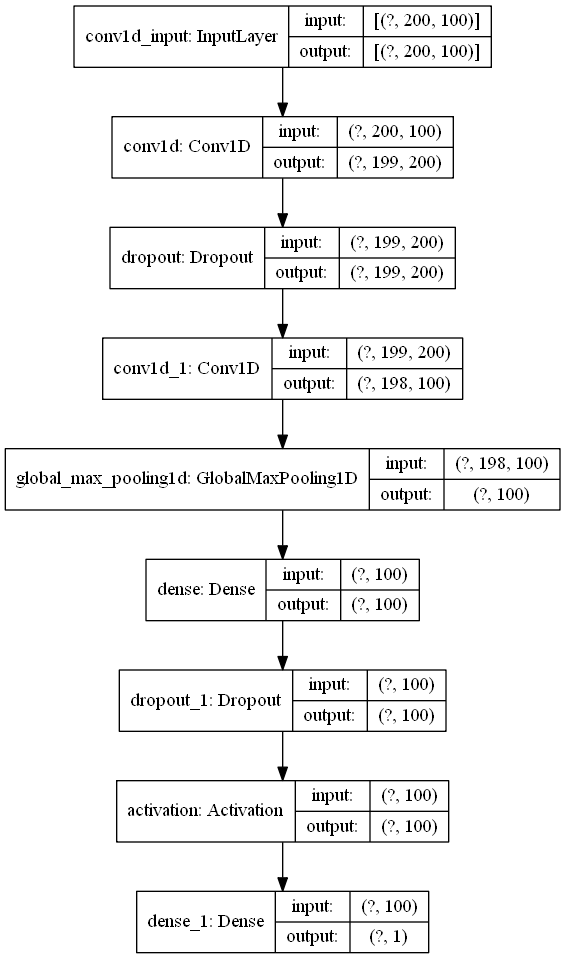

In [27]:
if os.path.isfile(f"{model_name}.h5"):
    model = load_model(f"{model_name}.h5")
else:
    #optimizer = optimizers.Adam(lr=lr, decay=decay)
    model = Sequential()
    model.add(Conv1D(filter1, kernel_size, padding='valid', activation='relu', strides=strides, 
                     input_shape=(maxlen, embedding_dims)))
    model.add(Dropout(dropout))
    model.add(Conv1D(filter2, kernel_size, padding='valid', activation='relu', strides=strides))
    #Reducimos la dimension a 1 dimension, para poder aplicar una capa densa
    model.add(GlobalMaxPooling1D())
    model.add(Dense(hidden_dims))
    model.add(Dropout(dropout))
    model.add(Activation('relu'))
    model.add(Dense(num_labels, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()
plot_model(model, show_shapes=True, show_layer_names=True)

### Calculo de parametros

In [28]:
print("Parametros de conv1d  :", (embedding_dims*kernel_size+1)*filter1)
print("Parametros de conv1d_1:", (filter1*kernel_size+1)*filter2)
print("Parametros de dense   :", (filter2+1)*hidden_dims)
print("Parametros de dense_1 :", (hidden_dims+1)*num_labels)

Parametros de conv1d  : 40200
Parametros de conv1d_1: 40100
Parametros de dense   : 10100
Parametros de dense_1 : 101


## Entrenamiento

In [29]:
if not os.path.isfile(f"{model_name}.h5"):
    history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test))
    loss, acc = model.evaluate(x_test, y_test, batch_size=batch_size)
    print("\nTest accuracy: %.1f%%" % (100.0 * acc))

Epoch 1/10
69/69 [==============================] - 8s 119ms/step - loss: 0.4906 - accuracy: 0.7629 - val_loss: 0.4099 - val_accuracy: 0.8120
Epoch 2/10
69/69 [==============================] - 6s 94ms/step - loss: 0.3876 - accuracy: 0.8255 - val_loss: 0.4004 - val_accuracy: 0.8159
Epoch 3/10
69/69 [==============================] - 7s 96ms/step - loss: 0.3674 - accuracy: 0.8377 - val_loss: 0.3605 - val_accuracy: 0.8409
Epoch 4/10
69/69 [==============================] - 7s 95ms/step - loss: 0.3547 - accuracy: 0.8434 - val_loss: 0.3581 - val_accuracy: 0.8425
Epoch 5/10
69/69 [==============================] - 7s 97ms/step - loss: 0.3453 - accuracy: 0.8482 - val_loss: 0.3476 - val_accuracy: 0.8457
Epoch 6/10
69/69 [==============================] - 7s 101ms/step - loss: 0.3279 - accuracy: 0.8581 - val_loss: 0.3478 - val_accuracy: 0.8465
Epoch 7/10
69/69 [==============================] - 7s 101ms/step - loss: 0.3201 - accuracy: 0.8623 - val_loss: 0.3366 - val_accuracy: 0.8514
Epoch 8/10

## Guardar modelo

In [30]:
if os.path.isfile(f"{model_name}.h5"):
    model = load_model(f"{model_name}.h5")
    hist_df = pd.read_csv(f"{model_name}_history.csv")
else:
    model.save(f"{model_name}.h5")
    hist_df = pd.DataFrame(history.history)
    hist_csv_file = f"{model_name}_history.csv"
    with open(hist_csv_file, mode='w') as f:
        hist_df.to_csv(f)

## Grafico de comportamieno durante entrenamiento

<IPython.core.display.Javascript object>


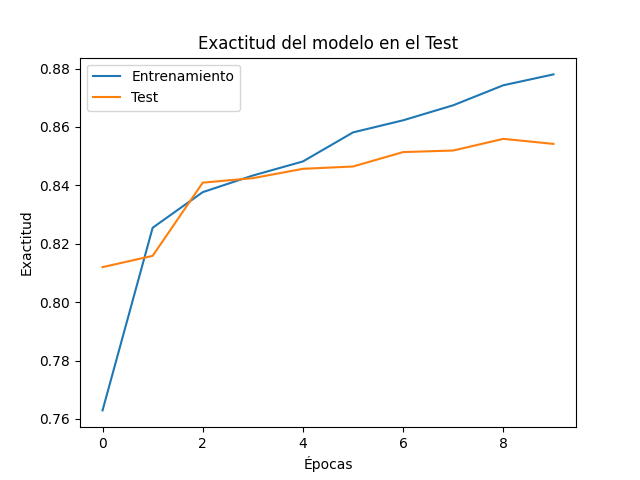

In [31]:
from matplotlib import pyplot as plt
fig2 = plt.figure()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Exactitud del modelo en el Test")
plt.ylabel('Exactitud')
plt.xlabel('Épocas')
plt.legend(['Entrenamiento', 'Test'], loc='upper left')
plt.show()

<IPython.core.display.Javascript object>


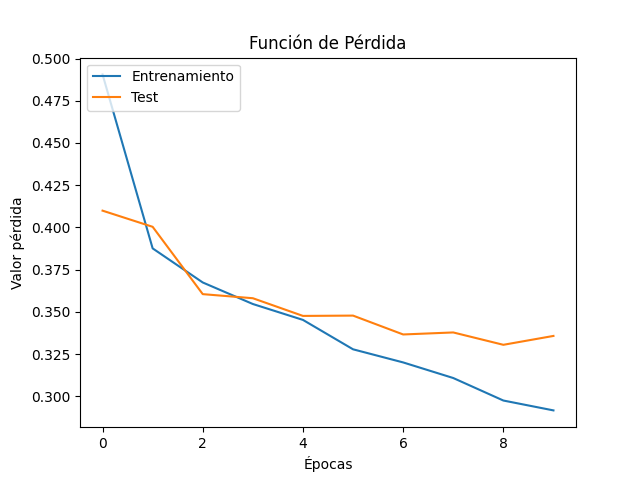

In [32]:
fig3 = plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Función de Pérdida")
plt.ylabel('Valor pérdida')
plt.xlabel('Épocas')
plt.legend(['Entrenamiento', 'Test'], loc='upper left')
plt.show()

## Matriz de confusión

In [33]:
from sklearn.metrics import confusion_matrix, accuracy_score

y_pred = np.round(model.predict(x_test, use_multiprocessing=True)).T[0].astype(np.bool)
y_pred

array([False, False,  True, ..., False,  True, False])

In [34]:
matrix = confusion_matrix(y_test, y_pred)
print("Matriz de Confusión")
print(matrix)

Matriz de Confusión
[[6626  874]
 [1313 6187]]


In [35]:
acc = accuracy_score(y_test, y_pred)
print("Accuracy")
print(acc)

Accuracy
0.8542


## Probando el modelo

In [36]:
def predict(text, vectorizador):
    x_sample = vectorizador.vectorizacion([text])
    prediction = model.predict(x_sample, use_multiprocessing=True)[0][0]
    return prediction

In [37]:
print(predict("This movie is really bad", vectorizador))
print(predict("I recommend this movie", vectorizador))

0.05703225
0.77112997


## Impacto

In [38]:
import seaborn as sns

In [39]:
def words_impacts(text, vectorizador):
    x_sample = vectorizador.vectorizacion([text])
    baseline = model.predict(x_sample, use_multiprocessing=True)[0][0]
    
    tokens = np.unique(tokenizer(text))
    
    new_tokens = []
    impacts = []
    print("Tokens truncados: ")
    for token in tokens:
        try:
            vec = vectorizador.vectorizacion([token])
            impact = model.predict(vec)[0][0]
            impacts.append(impact)
            new_tokens.append(token)
        except:# tokens truncados
            print(token)

    impacts = impacts#-baseline    
    new_tokens = np.array(new_tokens)
    impacts = np.array(impacts)
    return new_tokens, impacts, baseline

In [40]:
def plot_text_with_impacts(tokens, impacts, n_cols=10):
    assert len(tokens) == len(impacts)
    n_rows = (len(tokens) // n_cols) + 1
    
    words = np.lib.pad(tokens, (0, n_rows*n_cols - len(tokens)), 'constant', constant_values='0')
    words = words.reshape(n_rows, n_cols)

    impact_data = np.lib.pad(impacts, (0, n_rows*n_cols - len(tokens)), 'constant', constant_values=np.nan)
    impact_data = impact_data.reshape(n_rows, n_cols)

    plt.figure(figsize=(n_cols*1.5, n_rows*1.2), dpi=80)
    sns.heatmap(impact_data, annot=words, square=False, fmt='')
    sns.set(font_scale=1)   

In [42]:
# Obtener un ejemplo
#n = np.random.randint(0, len(corpus))
n = 18571#18571#49420#13024
print(n)
sample = corpus[n]
print(sample)
print("*******")
tokens, impacts, baseline = words_impacts(sample, vectorizador)
print(f'Numero de tokens: {len(tokens)}')
print(f'Puntaje obtenido: {baseline}, Label: {labels[n]} ')

#len(tokens)

18571
I walk out of very few movie screenings and this movie managed to become one of those that I couldn't bear to watch any longer. As far as the awards it won goes, the ones awarded by Turkish festivals are not credible in my opinion. My only explanation for the Queens festival award was to think that somehow a layer of comedy was "gained in translation" as the subtitles helped distract attention from the horrendous performances.<br /><br />At the beginning of the screening I attended, the presenter briefly talked about the history of Turkish cinema and at one point mentioned that early Turkish cinema was appropriately named "stage cinema" since many of the filmmakers and actors involved were people from the theater scene.<br /><br />Ironically, this movie falls right into that category. English speakers reading subtitles may think that Turkish is a naturally loud language and attribute all the yelling in the movie to that, but observant native commentators will immediately notice t

<IPython.core.display.Javascript object>


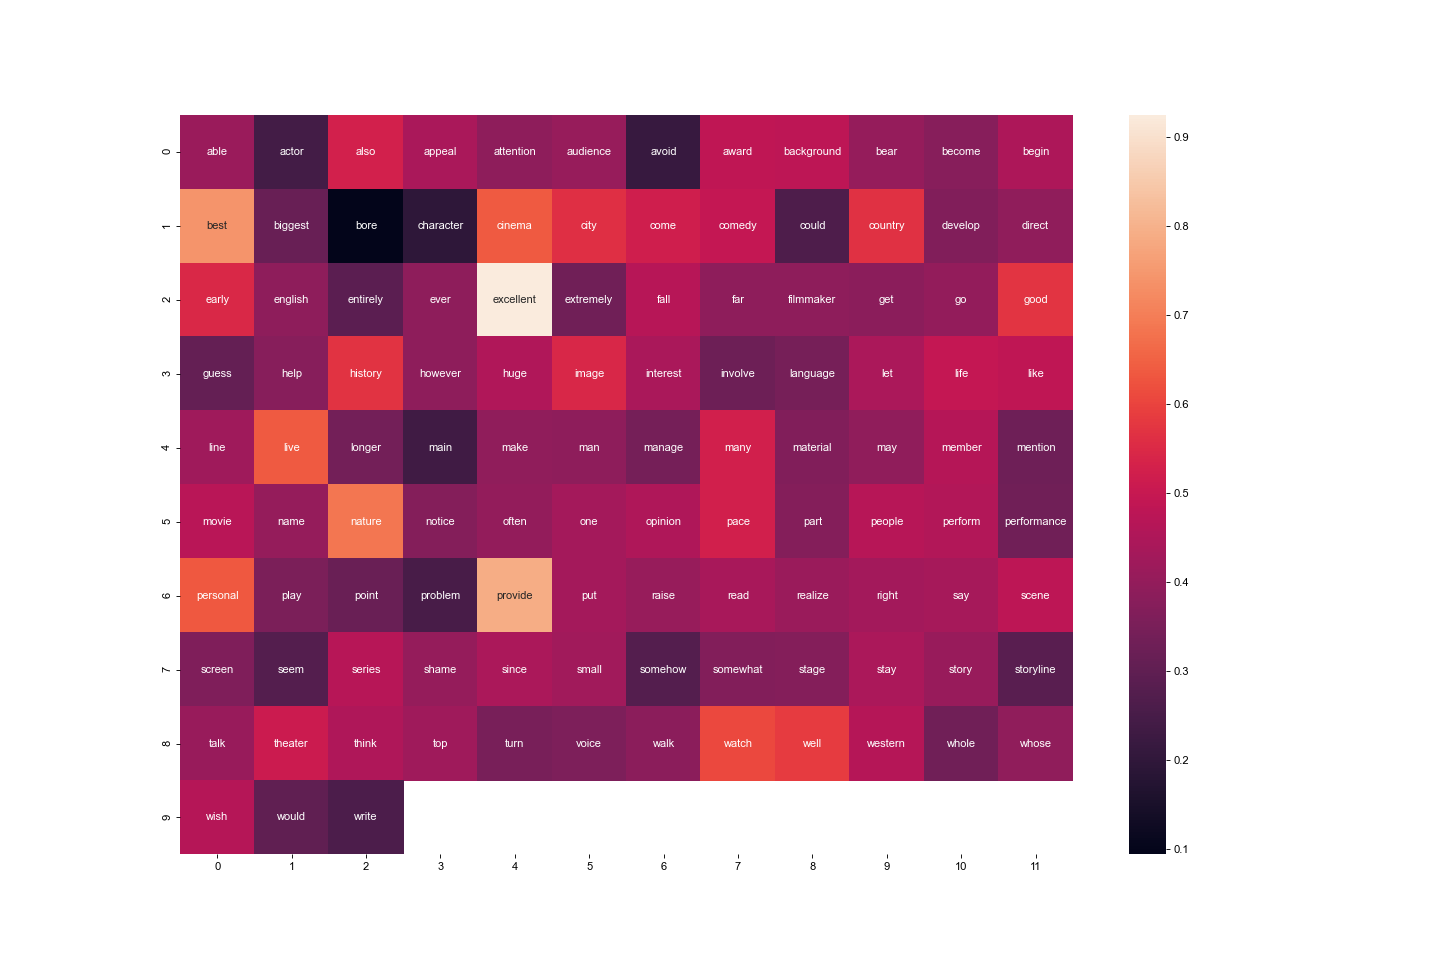

In [43]:
plot_text_with_impacts(tokens, impacts, n_cols=12)